In [1]:
import pandas as pd
import folium

Координаты Московии 55°45′21″ с. ш. 37°37′04″ в. д.

In [2]:
df = pd.read_json(r'data-28509-2021-07-11.json', encoding='cp1251')
df10 = df[0:10]
df100 = df[0:100]
df500 = df[0:500]

In [3]:
districts = df.groupby('District')
#print(districts.groups.keys())
num_of_districts = districts.ngroups


In [4]:
moskow_map = folium.Map(location=[55.75, 37.61],
                        zoom_start=11,
                        tiles="Stamen Toner")


for row in df100.itertuples():
    latitude = row[1]
    longitude = row[2]
    #name = row[6]
    
    folium.CircleMarker(location=[latitude, longitude],
                        radius=5,
                        fill=True).add_to(moskow_map)
    
    # folium.Marker(location=[latitude, longitude], 
    #           icon=folium.DivIcon(
    #               icon_size=(160, 20),
    #               html='''<div style="
    #               font-size: 12pt;
    #               font-family: serif;
    #               color: blue; 
    #               text-align: left;
    #               ">''' + name + '''</div>''')
    #          ).add_to(moskow_map)


moskow_map


In [5]:
import osmnx as ox

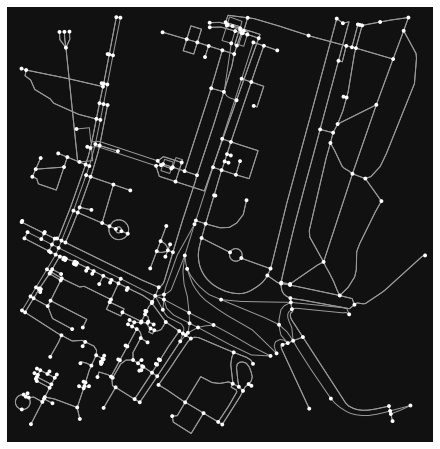

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
G = ox.graph_from_point((55.75, 37.61), dist=250, network_type='all')
ox.plot_graph(G)

In [7]:
moskow_map_net = folium.Map(location=[55.75, 37.61],
                        zoom_start=11,
                        tiles="Stamen Toner")
ox.folium.plot_graph_folium(G, moskow_map_net)
moskow_map_net


In [8]:
import geopandas as gpd

Районы:  Даниловский, Преснеский, Хамовники, Выхино, Тверской

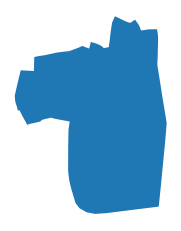

In [9]:
danilovsky_gdf = ox.geocode_to_gdf('Danilovsky , Moskow, Russia')
presnensky_gdf = ox.geocode_to_gdf('Presnensky , Moskow, Russia')
khamovniki_gdf = ox.geocode_to_gdf('Khamovniki , Moskow, Russia')
tverskoy_gdf = ox.geocode_to_gdf('Tverskoy , Moskow, Russia')   

ax = ox.project_gdf(danilovsky_gdf).plot()
_ = ax.axis('off')

In [16]:
moskow_map_districts = folium.Map(location=[55.75, 37.61],
                        zoom_start=11,
                        tiles="Stamen Toner")

def add_district(map_object, district_gdf, color):
    for _, r in district_gdf.iterrows(): 
        sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j,
                            style_function=lambda x: {'fillColor': color})
        geo_j.add_to(map_object)

add_district(moskow_map_districts, danilovsky_gdf, 'orange')
add_district(moskow_map_districts, presnensky_gdf, 'orange')
add_district(moskow_map_districts, khamovniki_gdf, 'orange')
add_district(moskow_map_districts, tverskoy_gdf, 'orange')

df = danilovsky_gdf.to_crs(epsg=2263)
df['centroid'] = df.centroid

df = df.to_crs(epsg=4326)
df['centroid'] = df['centroid'].to_crs(epsg=4326)
lat = 55.706477
lon =  37.642821

# folium.Marker(location=[lat, lon],
#             popup='some data').add_to(moskow_map_districts)

img = folium.raster_layers.ImageOverlay(        
        image='Danilovskiy.png',
        bounds=[[55.706477 - 0.01, 37.642821 - 0.02], [55.706477 + 0.01, 37.642821 + 0.02]],
        opacity=1.0,
        interactive=True,
        cross_origin=False,
        zindex=1,
    )

img.add_to(moskow_map_districts)
folium.LayerControl().add_to(moskow_map_districts)

moskow_map_districts
